___
# Ciência dos Dados - PROJETO 2

___
## Nome 1 João Pedro Montefeltro Junqueira Meirelles

## Nome 2 Ester dos Santos Quintino

___

___

## 1. Problema

O Classificador Naive-Bayes, o qual se baseia no uso do teorema de Bayes, é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser SPAM considerando as palavras em seu conteúdo e, de forma complementar, permite calcular a probabilidade de uma mensagem ser HAM dada as palavras descritas na mensagem.

Para realizar o MVP (minimum viable product) do projeto, você precisa programar uma versão do classificador que "aprende" o que é uma mensagem SPAM considerando uma base de treinamento e comparar o desempenho dos resultados com uma base de testes. 


___
## 2. Separação da base de dados em Treinamento e Teste

A base de dados deve ser separada em duas partes, aleatoriamente, considerando: 
    
    75% dos dados para a parte Treinamento; e
    25% dos dados para a parte Teste.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as jeca
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\furyo\Desktop\CDDP-P2


# Lendo a base de dados

In [3]:
dados = pd.read_excel('spamham.xlsx')
dados = dados.iloc[np.random.permutation(len(dados))]

In [4]:
num = len(dados.Email)
setenta_cinco = int(num*0.75)

___
## 3. Classificador Naive-Bayes

# Limpeza das mensagens e remoção dos caracteres que não afetam a classificação

In [5]:
arranca = [':',',','"','/',';','.','=','+','(',')','*']
for i in range(num):
    dados.Email[i:i+1] = dados.Email[i:i+1].str.replace('  ',' ') # Mudança de 2 espaços para 1
    for j in arranca:
        dados.Email[i:i+1] = dados.Email[i:i+1].str.replace(j,'') 

dados.Email

3627    Meeting u is my work   Tel me when shall i do ...
5332                  I think steyn surely get one wicket
3267    Which is why i never wanted to tell you any of...
4336                        on a Tuesday night r u 4 real
78                 Does not operate after &lt#&gt or what
5460    December only! Had your mobile 11mths? You are...
4895           2 and half years i missed your friendship-
1200               Otherwise had part time job na-tuition
3251         Come to medical college at 7pm forward it da
812     Congratulations ur awarded either å£500 of CD ...
4359    Night sweet sleep well! I've just been to see ...
559     Aiyo U always c our ex one I dunno abt mei she...
3818    sorry brah just finished the last of my exams ...
2488    I have 2 docs appointments next week I'm tired...
5403                   So gd got free ice cream I oso wan
2802                    FreeMsg>FAV XMAS TONES!Reply REAL
1465    YOU 07801543489 are guaranteed the latests Nok...
54      SMS ac

# Separação da base de dados em Treinamento e Teste na fração 3 para 1.

In [6]:
#75% dos dados para a parte Treinamento.
#25% dos dados para a parte Teste.

dados_treino = dados.iloc[:setenta_cinco]
dados_teste = dados.iloc[setenta_cinco:num]
dados_reais = dados.iloc[setenta_cinco:num]


# Probabilidade de  uma mensagem ser SPAM e Probabilidade de uma mensagem ser HAM

In [7]:
dados_teste = dados_teste.Email.values #Values retorna uma lista com os emails.

Spam = dados_treino.Email[dados_treino.Class == 'spam'].values
Ham = dados_treino.Email[dados_treino.Class == 'ham'].values

# Probabilidade de uma mensagem ser SPAM:

Pspam = (dados_treino.Email[dados_treino.Class == 'spam'].count()/dados_treino.Email.count())

# Probabilidade de uma mensagem ser HAM:

Pham = (dados_treino.Email[dados_treino.Class == 'ham'].count()/dados_treino.Email.count())

# Criação de uma lista que armazena as palavras do email

In [8]:
#SPAM
spam_words = []
ham_words = []
i = 0
while i < len(Spam):
    word = Spam[i].split()
    for j in word:
        if j.isdigit == True:
            pass
        if len(j) <= 3:
            pass
        else:
            spam_words.append(j)
    i+=1

In [9]:
#HAM
i = 0
while i < len(Ham):
    word = Ham[i].split()
    for j in word:
        if j.isdigit == True:
            pass
        if len(j) <= 3:
            pass
        else:
            ham_words.append(j)
    i+=1

# Criação de um dicionário 

In [30]:
spam_dic = {}
for i in spam_words:
    n = 1
    if i in spam_dic:
        pass
    else:   
        for j in spam_words:
            if i == j:
                n += 1
            else:
                pass
        spam_dic[i] = (n + 1)/(pspam + (len(spam)+len(ham))
ham_dic = {}
for i in ham_words:
    n = 1
    if i in ham_dic:
        pass
    else:   
        for j in ham_words:
            if i == j:
                n += 1
            else:
                pass
        ham_dic[i] = (n + 1)/(pham + (len(ham)+len(ham))

SyntaxError: invalid syntax (<ipython-input-30-f3ea8425f99c>, line 13)

# CLassificação

In [31]:
def classificando(emails,spam,ham,Pspam,Pham,roc):
    classificados = {} #Devolve se o email é SPAM ou se o email é HAM
    for emailss in emails:
        pspam = (Pspam + 1)/(len(spam) + (len(spam)+len(ham)))
        pham = (Pham + 1)/(len(spam) + (len(spam)+len(ham)))
        email = str(emailss).split()
        
        for w in email: #probabilidade de uma palavra acontecer se a mensagem na base treinamento é considerada SPAM e HAM.
            if w in spam:
                pspam = pspam*spam[w]
            elif w in ham:
                pham = pham*ham[w]
            else:
                pspam = pspam * (1/(len(spam)+len(ham)))
        if pspam > roc*(pspam + pham):
            classificados[emailss] = 'spam'
        else:
            classificados[emailss] = 'ham'
    return classificados

In [32]:
# Reestruturação dos dados teste
teste = []
for i in dados_teste:
    teste.append(i)
dados_teste = teste

In [33]:
#Guardando classificados e probabilidades em variáveis
roc = 0.5
tudo_certo = classificando(dados_teste,spam_dic,ham_dic,Pspam,Pham,roc)
tudo_certo

{'Superb Thought- \\Be grateful that u dont have everything u want That means u still have an opportunity to be happier tomorrow than u are today\\-': 'ham',
 'THIS IS A LONG FUCKIN SHOWR': 'ham',
 'What Today-sundaysunday is holidayso no work': 'ham',
 "Let me know how to contact you I've you settled in a room Lets know you are ok": 'ham',
 'photoshop makes my computer shut down': 'ham',
 'Just now saw your messageit k da': 'ham',
 "Nothing will ever be easy But don't be looking for a reason not to take a risk on life and love": 'ham',
 'Same as kallis dismissial in 2nd test-': 'ham',
 "Man this bus is so so so slow I think you're gonna get there before me": 'ham',
 'Pick you up bout 730ish? What time are and that going?': 'ham',
 "Sorry I'll call later": 'ham',
 'Nationwide auto centre or something like that on Newport road I liked them there': 'ham',
 'Long after I quit I get on only like 5 minutes a day as it is': 'ham',
 'I love you You set my soul on fire It is not just a spark B

In [34]:
# Lista com apenas spam's e ham's
results = []
for i in dados_teste:
    results.append(tudo_certo[i])

In [35]:
df_meus = pd.DataFrame({
    'Class' : results,
    'Emails' : dados_teste
})

In [36]:
valores_reais = dados_reais.Class.values

In [37]:
df_comp = pd.DataFrame({
    'Minhas' : results,
    'Reais' : valores_reais
})

In [38]:
# % de acertos
spam_spam = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'spam')].count()
spam_ham = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'ham')].count()
ham_ham = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'ham')].count()
ham_spam = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'spam')].count()

In [39]:
print(pd.crosstab(df_comp.Reais,df_comp.Minhas))

Minhas   ham  spam
Reais             
ham     1173    43
spam     177     0


## 4. Curva ROC

In [40]:
def reclass(dados_teste,spam_dic,ham_dic,Pspam,Pham,roc):
    tudo_certo = classificando(dados_teste,spam_dic,ham_dic,Pspam,Pham,roc)
    results = []
    for i in dados_teste:
        results.append(tudo_certo[i])
    df_meus = pd.DataFrame({
        'Class' : results,
        'Emails' : dados_teste
    })
    valores_reais = dados_reais.Class.values
    df_comp = pd.DataFrame({
        'Minhas' : results,
        'Reais' : valores_reais
    })
    spam_spam = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'spam')].count()
    spam_ham = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'ham')].count()
    ham_ham = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'ham')].count()
    ham_spam = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'spam')].count()

    return df_comp, spam_spam, spam_ham, ham_ham, ham_spam


In [47]:
r = np.arange(0.5,1,0.01)
sensibilidade = []
especificidade = []
lista_SV = []
lista_SF = []
lista_HV = []
lista_HF = []

for roca in r:
    df_comp, spam_spam, spam_ham, ham_ham, ham_spam = reclass(dados_teste,spam_dic,ham_dic,Pspam,Pham,roca)
    curva_intel_verdadeiro = spam_spam/(spam_spam + spam_ham)
    curva_intel_falso = ham_ham/(ham_ham + ham_spam)
    sensibilidade.append(curva_intel_verdadeiro)
    especificidade.append(curva_intel_falso)
    lista_SV.append(spam_spam)
    lista_SF.append(spam_ham)
    lista_HV.append(ham_ham)
    lista_HF.append(ham_spam)
    print(pd.crosstab(df_comp.Reais,df_comp.Minhas))
    print('\n')

Minhas   ham  spam
Reais             
ham     1173    43
spam     177     0


Minhas   ham  spam
Reais             
ham     1173    43
spam     177     0


Minhas   ham  spam
Reais             
ham     1173    43
spam     177     0


Minhas   ham  spam
Reais             
ham     1173    43
spam     177     0


Minhas   ham  spam
Reais             
ham     1173    43
spam     177     0


Minhas   ham  spam
Reais             
ham     1173    43
spam     177     0


Minhas   ham  spam
Reais             
ham     1174    42
spam     177     0


Minhas   ham  spam
Reais             
ham     1174    42
spam     177     0


Minhas   ham  spam
Reais             
ham     1174    42
spam     177     0


Minhas   ham  spam
Reais             
ham     1174    42
spam     177     0


Minhas   ham  spam
Reais             
ham     1174    42
spam     177     0


Minhas   ham  spam
Reais             
ham     1174    42
spam     177     0


Minhas   ham  spam
Reais             
ham     1174    42
spam   

In [48]:
sensibilidade = sorted(sensibilidade)
especificidade = sorted(especificidade)

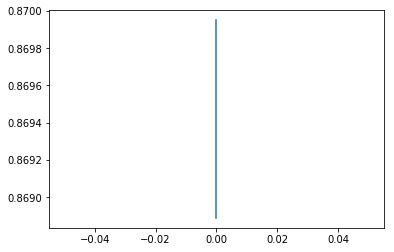

In [49]:
jeca.plot(sensibilidade,especificidade)
jeca.show()

___
## 5. Qualidade do Classificador alterando a base de treinamento

def repeat(dados,setenta_cinco):
    dados = dados.iloc[np.random.permutation(len(dados))]
    dados_treino = dados.iloc[:setenta_cinco]
    dados_teste = dados.iloc[setenta_cinco:num]
    dados_reais = dados.iloc[setenta_cinco:num]
    dados_teste = dados_teste.Email.values
    Spam = dados_treino.Email[dados_treino.Class == 'spam'].values
    Ham = dados_treino.Email[dados_treino.Class == 'ham'].values
    Pspam = (dados_treino.Email[dados_treino.Class == 'spam'].count()/dados_treino.Email.count())
    Pham = (dados_treino.Email[dados_treino.Class == 'ham'].count()/dados_treino.Email.count())
    spam_words = []
    ham_words = []
    i = 0
    while i < len(Spam):
        word = Spam[i].split()
        for j in word:
            if j.isdigit == True:
                pass
            if len(j) <= 3:
                pass
            else:
                spam_words.append(j)
        i+=1
    i = 0
    while i < len(Ham):
        word = Ham[i].split()
        for j in word:
            if j.isdigit == True:
                pass
            if len(j) <= 3:
                pass
            else:
                ham_words.append(j)
        i+=1
    spam_dic = {}
    for i in spam_words:
        n = 1
        if i in spam_dic:
            pass
        else:   
            for j in spam_words:
                if i == j:
                    n += 1
                else:
                    pass
            spam_dic[i] = (n + 1)/(len(spam_words)*2 + len(ham_words))
    ham_dic = {}
    for i in ham_words:
        n = 1
        if i in ham_dic:
            pass
        else:   
            for j in ham_words:
                if i == j:
                    n += 1
                else:
                    pass
            ham_dic[i] = (n + 1)/(len(ham_words)*2 + len(spam_words))
    teste = []
    for i in dados_teste:
        teste.append(i)
    dados_teste = teste
    roc = 0.7
    tudo_certo = classificando(dados_teste,spam_dic,ham_dic,Pspam,Pham,roc)
    results = []
    for i in dados_teste:
        results.append(tudo_certo[i])
    df_meus = pd.DataFrame({
        'Class' : results,
        'Emails' : dados_teste
    })
    valores_reais = dados_reais.Class.values
    df_comp = pd.DataFrame({
        'Minhas' : results,
        'Reais' : valores_reais
    })
    spam_spam = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'spam')].count()
    spam_ham = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'ham')].count()
    ham_ham = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'ham')].count()
    ham_spam = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'spam')].count()
    
    return spam_spam , spam_ham , ham_ham , ham_spam

Glazz = 1000
i = 0

lista_spam_spam = []
lista_spam_ham = []
lista_ham_ham = []
lista_ham_spam = []

while i<Glazz:
    n_spam_spam,n_spam_ham,n_ham_ham,n_ham_spam = repeat(dados,setenta_cinco)
    lista_spam_spam.append(n_spam_spam)
    lista_spam_ham.append(n_spam_ham)
    lista_ham_ham.append(n_ham_ham)
    lista_ham_spam.append(n_ham_spam)
    i = i + 1